In [1]:
#load packages
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# text cleaning packages
import neattext.functions as nfx

In [4]:
#load dataset
df = pd.read_csv('emotion_dataset.csv')
df = df[['Text','Emotion']]
df

,Text,Emotion
0,Why ?,neutral
1,Sage Act upgrade on my to do list for tommorow.,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness
3,Such an eye ! The true hazel eye-and so brill...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,surprise
34788,The world didnt give it to me..so the world MO...,joy
34789,A man robbed me today .,anger
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",fear


In [5]:
#shape
df.shape

(34792, 2)

In [6]:
#datatypes
df.dtypes

Text       object
Emotion    object
dtype: object

In [7]:
#check for missing values
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

<AxesSubplot:>

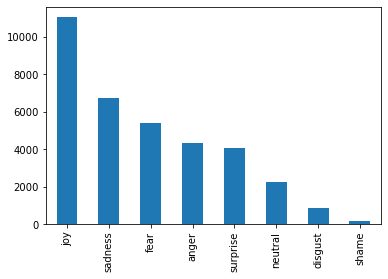

In [8]:
#value counts of emotions
df['Emotion'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Emotion', ylabel='count'>

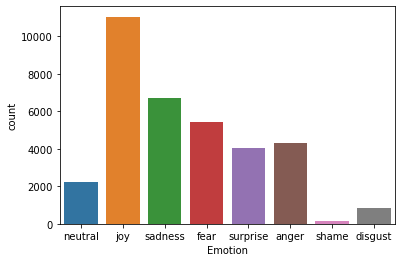

In [9]:

sns.countplot(x = 'Emotion',data = df )

In [10]:
#Sentiment Analysis
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result


In [11]:
#Test the function 
get_sentiment("I  coding")

'Neutral'

In [12]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [13]:
df.head()

,Text,Emotion,Sentiment
0,Why ?,neutral,Neutral
1,Sage Act upgrade on my to do list for tommorow.,joy,Neutral
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness,Negative
3,Such an eye ! The true hazel eye-and so brill...,joy,Positive
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy,Neutral


In [14]:
 df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

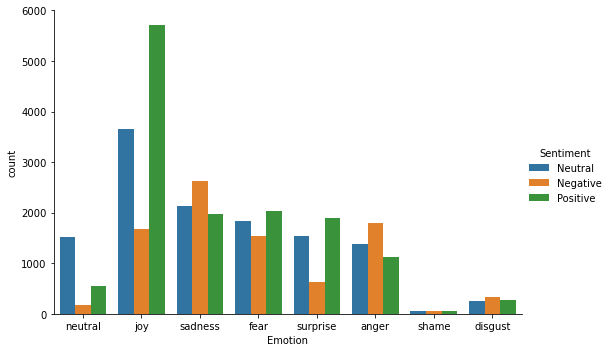

In [15]:
#plot the data again
sns.factorplot
sns.catplot
sns.catplot(x = 'Emotion',hue = 'Sentiment',data = df,kind = 'count',aspect = 1.5)

# Text cleaning

In [16]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [17]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### Keyword Extraction

In [18]:
from collections import Counter 
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [19]:
#list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [20]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [21]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text']
#Fun document
joy_docx = ' '.join(joy_list)
joy_docx
#Extract keywords
joy_key = extract_keywords(joy_docx)
joy_key

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

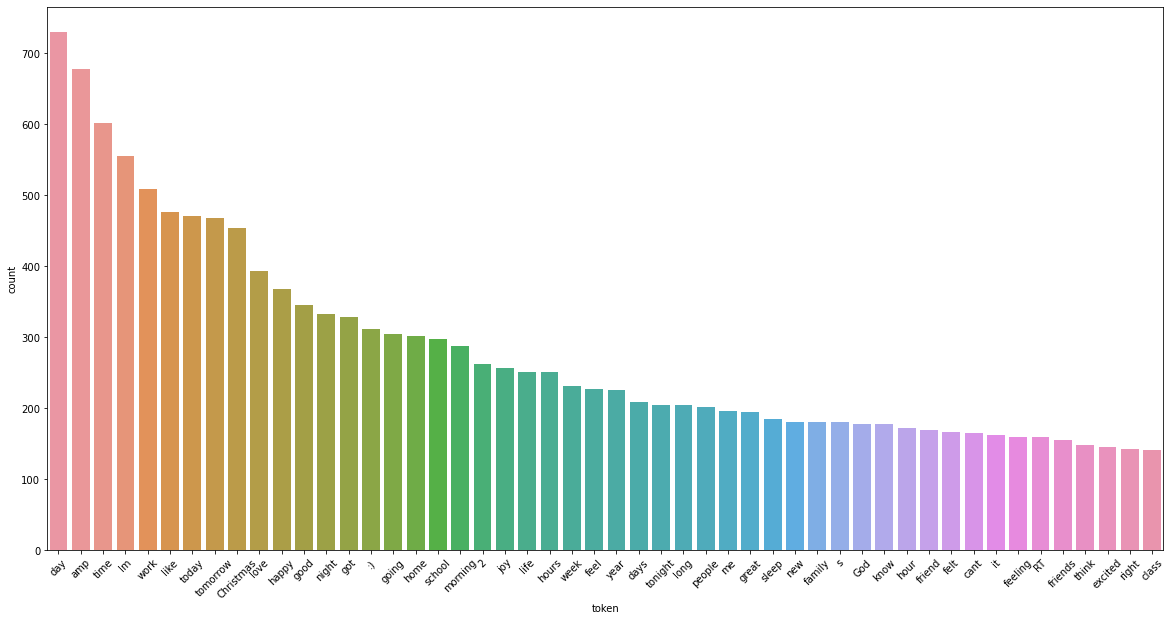

In [22]:
# plot
def plot_most_common_words(mydict):
    df_1 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_1)
    plt.xticks(rotation=45)
    plt.show()
    
plot_most_common_words(joy_key)
    
    

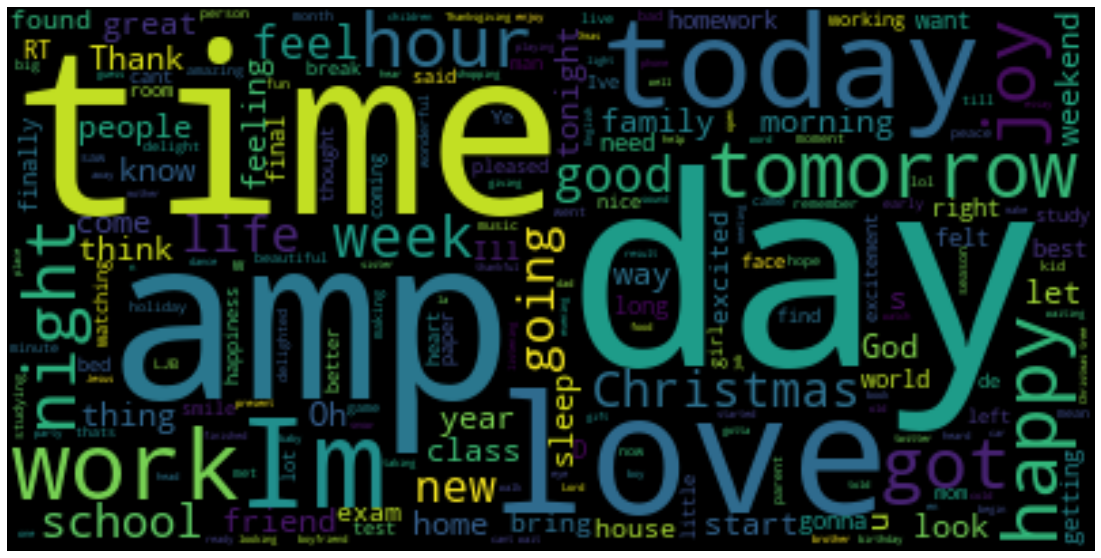

In [23]:
#wordcloud
from wordcloud import WordCloud

def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize = (20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
plot_wordcloud(joy_docx)

# Machine learning part
    + Naive bayes
    + Logistic Regression
    + KNN
    + Descision Tree

#### Compare with SparkNLP/ NLU John Snows Lab

In [24]:
## Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

#Split our dataset
from sklearn.model_selection import train_test_split

### Build Features from our text

In [26]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [27]:
#Vectorizer 
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [28]:
# Get features by name
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [29]:
# To dense array(NUMPY)
#X.toarray()


In [30]:
# Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

# Build our Model


In [31]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [32]:
#Accuracy
#method 1
nv_model.score(X_test,y_test)

0.5642843456600881

In [33]:
#Predictions
y_pred_for_nv = nv_model.predict(X_test)
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

# Make single prediction
    #Vectorize our text
    #Apply our trained model
  

In [75]:
sample_text = ["damn that is terrible! "]

In [76]:
vect = cv.transform(sample_text).toarray()

In [77]:
#Make prediction
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [78]:
#Check for prediction probability
nv_model.predict_proba(vect)

array([[1.53170176e-01, 1.30043558e-04, 4.75750034e-02, 2.75482566e-01,
        5.09833670e-05, 4.22960928e-01, 3.19417233e-06, 1.00627106e-01]])

In [79]:
# Get all class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [80]:
np.max(nv_model.predict_proba(vect))

0.42296092781350364

In [81]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    prediction_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,prediction_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(prediction_proba)))
    return pred_percentage_for_all

In [82]:
predict_emotion(sample_text,nv_model)

Prediction:sadness, Prediction Score:0.42296092781350364


{'anger': 0.15317017622053805,
 'disgust': 0.0001300435579588359,
 'fear': 0.04757500338941066,
 'joy': 0.275482565603049,
 'neutral': 5.0983367031079685e-05,
 'sadness': 0.42296092781350364,
 'shame': 3.1941723299450306e-06,
 'surprise': 0.10062710587618003}

In [83]:
 predict_emotion(["He looks strict"],nv_model)

Prediction:joy, Prediction Score:0.7146520535345646


{'anger': 0.08248676891921382,
 'disgust': 0.03144994366345419,
 'fear': 0.056155523521313304,
 'joy': 0.7146520535345646,
 'neutral': 0.005326542129157229,
 'sadness': 0.0789360587010898,
 'shame': 0.0004644765809071855,
 'surprise': 0.03052863295029995}

In [43]:
#Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [44]:
#Confusion matrix
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

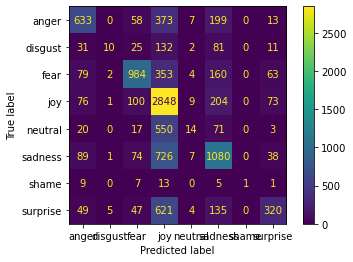

In [45]:
#Plot confusion matrix
plot_confusion_matrix(nv_model,X_test,y_test)

### Save the model

In [46]:
import joblib
model_file = open("Emotion_classifier","wb")
joblib.dump(nv_model,model_file)
model_file.close

<function BufferedWriter.close>

### Model Interpretation


In [47]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

c:\Users\shial\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.622341444721211

In [99]:
#Single prediction
some_text = ["I feel like "]
predict_emotion(some_text,lr_model)

Prediction:sadness, Prediction Score:0.33656116518208584


{'anger': 0.054560093799191904,
 'disgust': 0.021750159017615477,
 'fear': 0.09972162296590083,
 'joy': 0.27505972671334794,
 'neutral': 0.16207890596302035,
 'sadness': 0.33656116518208584,
 'shame': 0.001921948006953604,
 'surprise': 0.048346378351884}

In [50]:
# Interpret model
import eli5
eli5.show_weights(lr_model,top=20)

In [63]:
class_names = ylabels.unique().tolist()
feature_names = cv.get_feature_names()

In [64]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)

In [59]:
?eli5.show_weights

Signature: eli5.show_weights(estimator, **kwargs)
Docstring:
Return an explanation of estimator parameters (weights)
as an IPython.display.HTML object. Use this function
to show classifier weights in IPython.

:func:`show_weights` accepts all
:func:`eli5.explain_weights` arguments and all
:func:`eli5.formatters.html.format_as_html`
keyword arguments, so it is possible to get explanation and
customize formatting in a single call.

Parameters
----------
estimator : object
    Estimator instance. This argument must be positional.

top : int or (int, int) tuple, optional
    Number of features to show. When ``top`` is int, ``top`` features with
    a highest absolute values are shown. When it is (pos, neg) tuple,
    no more than ``pos`` positive features and no more than ``neg``
    negative features is shown. ``None`` value means no limit.

    This argument may be supported or not, depending on estimator type.

target_names : list[str] or {'old_name': 'new_name'} dict, optional
    Name